In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from gbdt import decisiontree, xgbdt

# Data Loading

Data Source: http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

In [2]:
features = ['sex', 'length', 'diameter', 'height', 'weight', \
            'shuck_weight', 'visc_weight', 'shell_weight']
labels = ['rings']
intsex = {'M':0, 'F':1, 'I':2}

In [3]:
data = pd.read_csv('data/abalone.data', names = features + labels)

data['sex'] = data['sex'].replace(intsex)
data.loc[(data['rings'] < 10), 'rings'] = 0
data.loc[(data['rings'] >= 10), 'rings'] = 1

for x in features:
    data.loc[:, x] *= np.divide(1, data[x].max())

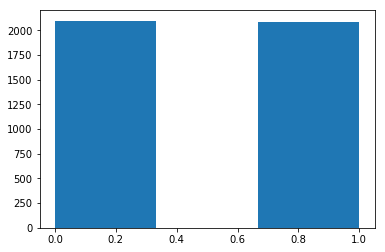

In [4]:
plt.hist(data['rings'], bins = 3)
pass;

In [5]:
   
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
df_train, df_valid = data.iloc[sample], data.drop(sample)

df_train.tail()
df_valid.tail()

,sex,length,diameter,height,weight,shuck_weight,visc_weight,shell_weight,rings
1557,1.0,0.521472,0.500000,0.097345,0.112193,0.090726,0.063158,0.089552,0
267,0.0,0.429448,0.423077,0.097345,0.103522,0.082325,0.083553,0.090050,0
216,0.0,0.552147,0.538462,0.115044,0.162803,0.116935,0.146053,0.134328,0
3931,1.0,0.674847,0.676923,0.146018,0.304548,0.209677,0.222368,0.298507,1
2038,1.0,0.343558,0.330769,0.070796,0.046717,0.048387,0.028947,0.032836,0


,sex,length,diameter,height,weight,shuck_weight,visc_weight,shell_weight,rings
4128,0.0,0.680982,0.669231,0.128319,0.325783,0.271505,0.299342,0.253731,0
4129,1.0,0.699387,0.653846,0.123894,0.270925,0.222446,0.184211,0.238806,1
4130,0.0,0.711656,0.692308,0.123894,0.291630,0.232863,0.232237,0.261692,1
4166,1.0,0.582822,0.561538,0.101770,0.176606,0.155914,0.116447,0.155224,1
4169,0.0,0.638037,0.592308,0.146018,0.279950,0.252016,0.236842,0.180597,1


# xgBoosting

In [6]:
df_train = df_train
df_valid = df_valid

In [7]:
params = {'gamma': 0.,
          'lambda': 1.,
          'maxdepth': 5,
          'learnrate': 0.3,
          'shrinkrate': 1.0,
          'earlystop_rounds': 4,
          'earlystop_precision': 1e-5,
          'min_lossredux': 0.1}

gbt = xgbdt(params)
gbt.train(df_train, df_valid, features, labels, nboost = 100)

Starting training
Iter   0, Train Loss: 0.3448086649, Valid Loss: 0.32733, Time: 2.69 secs
Iter   1, Train Loss: 0.1676611191, Valid Loss: 0.19305, Time: 3.81 secs
Iter   2, Train Loss: 0.1518368699, Valid Loss: 0.17428, Time: 3.71 secs
Iter   3, Train Loss: 0.1481054947, Valid Loss: 0.16955, Time: 3.88 secs
Iter   4, Train Loss: 0.1473035614, Valid Loss: 0.16833, Time: 4.08 secs
Iter   5, Train Loss: 0.1470756402, Valid Loss: 0.16797, Time: 4.50 secs
Iter   6, Train Loss: 0.1470083654, Valid Loss: 0.16787, Time: 5.09 secs
Iter   7, Train Loss: 0.1469882811, Valid Loss: 0.16784, Time: 4.87 secs
Iter   8, Train Loss: 0.1469822646, Valid Loss: 0.16783, Time: 5.13 secs
Iter   9, Train Loss: 0.1469804878, Valid Loss: 0.16783, Time: 5.60 secs
Iter  10, Train Loss: 0.1469799548, Valid Loss: 0.16783, Time: 5.99 secs
Iter  11, Train Loss: 0.1469797949, Valid Loss: 0.16783, Time: 6.35 secs
Iter  12, Train Loss: 0.1469797470, Valid Loss: 0.16783, Time: 6.30 secs
Iter  13, Train Loss: 0.146979732

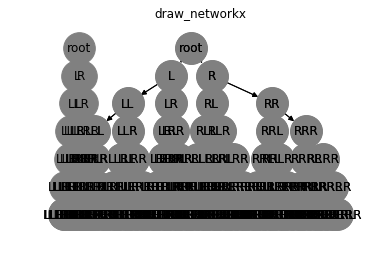

In [9]:
gbt.treeplot(0)
gbt.treeplot(len(gbt.trees) - 10)
gbt.treeplot(len(gbt.trees) - 1)